<a href="https://colab.research.google.com/github/OlegV12/Stats/blob/finalProject/statsProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [78]:
df = pd.read_csv('/gdrive/MyDrive/HousingPrices-Amsterdam-August-2021.csv')


Датасет объектов недвижимости г. Амстердам


In [79]:
df.head()

,Unnamed: 0,Address,Zip,Price,Area,Room,Lon,Lat
0,1,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
1,2,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
2,3,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
3,4,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
4,5,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538


Удалим колонку Unnamed: 0, переведем Zip(индекс) в целочисленный тип

In [80]:
df.drop(columns='Unnamed: 0', inplace=True)
df['Zip'] = df['Zip'].str.split(' ').str.get(0).astype(int)

Изучим общий вид данных

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Address  924 non-null    object 
 1   Zip      924 non-null    int64  
 2   Price    920 non-null    float64
 3   Area     924 non-null    int64  
 4   Room     924 non-null    int64  
 5   Lon      924 non-null    float64
 6   Lat      924 non-null    float64
dtypes: float64(3), int64(3), object(1)
memory usage: 50.7+ KB


In [90]:
df[df['Price'].isnull()]


,Address,Zip,Price,Area,Room,Lon,Lat
73,"Falckstraat 47 A, Amsterdam",1017,NaN,147,3,4.897454,52.360707
321,"Haarlemmerweg 705, Amsterdam",1067,NaN,366,12,4.787874,52.383877
610,"Zeeburgerkade 760, Amsterdam",1019,NaN,107,3,4.945022,52.369244
727,"Suikerplein 16, Amsterdam",1013,NaN,81,3,4.880976,52.389623


In [91]:
df['Price'].fillna(df['Price'].median(), inplace=True)

In [89]:
df.describe()

,Zip,Price,Area,Room,Lon,Lat
count,924.000000,9.200000e+02,924.000000,924.000000,924.000000,924.000000
mean,1056.742424,6.220654e+05,95.952381,3.571429,4.888605,52.363326
std,28.903784,5.389942e+05,57.447436,1.592332,0.053140,0.024028
min,1011.000000,1.750000e+05,21.000000,1.000000,4.644819,52.291519
25%,1025.000000,3.500000e+05,60.750000,3.000000,4.855834,52.352077
50%,1059.000000,4.670000e+05,83.000000,3.000000,4.886818,52.364631
75%,1077.000000,7.000000e+05,113.000000,4.000000,4.922337,52.377598
max,1109.000000,5.950000e+06,623.000000,14.000000,5.029122,52.423805


Изучим распределение основных признаков - цена, жилая площадь и количество комнат

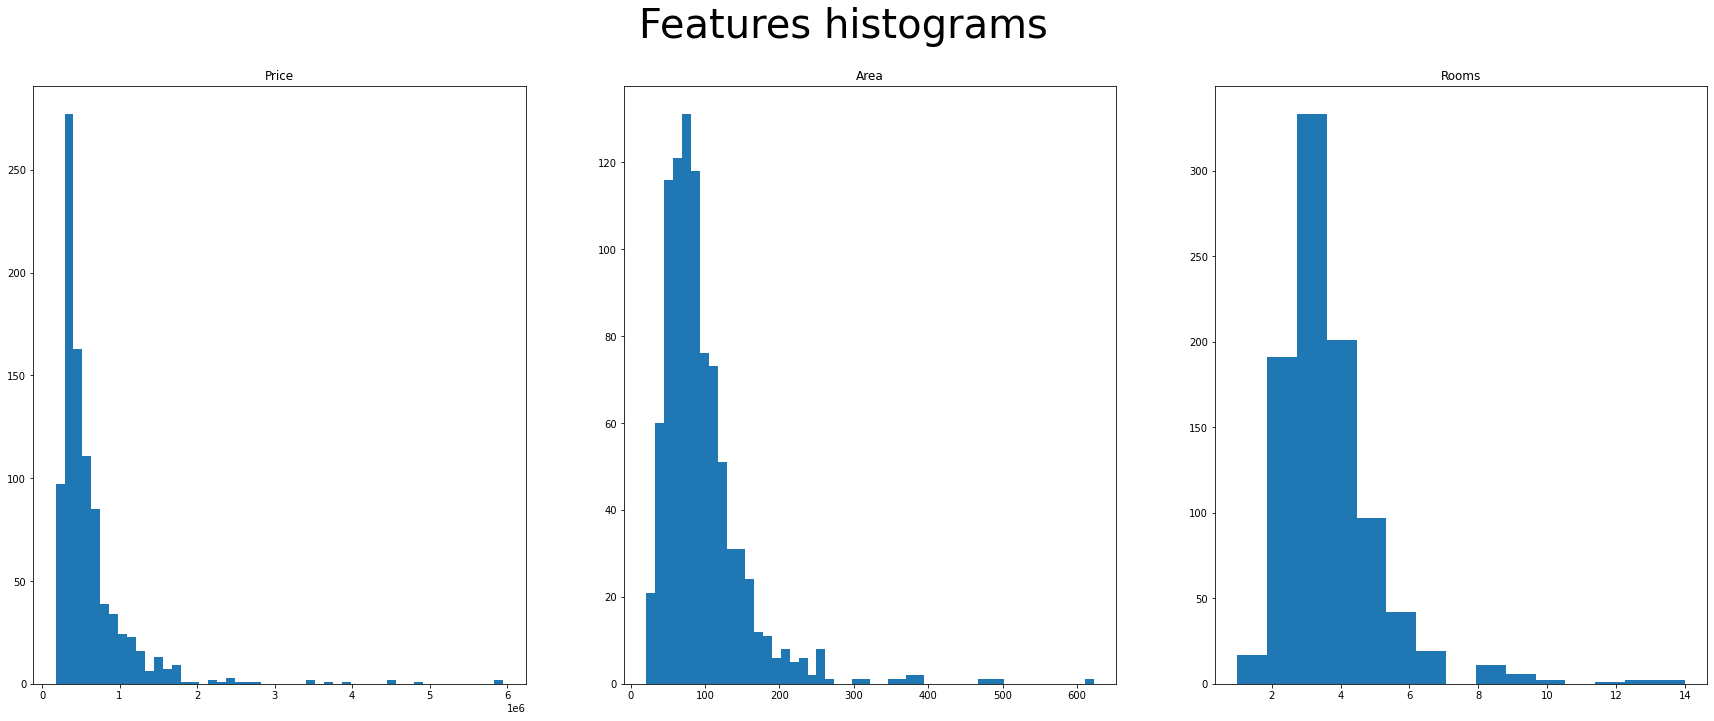

In [98]:
plt.figure(figsize=(30,11),)

price_plot = plt.subplot(131,  title='Price')
plt.hist(df.Price, bins=50,)


plt.subplot(132, title='Area',)
plt.hist(df.Area,bins=50)


plt.subplot(133, title='Rooms')
plt.hist(df.Room,bins=15)

plt.suptitle('Features histograms', fontsize='40')
plt.show()

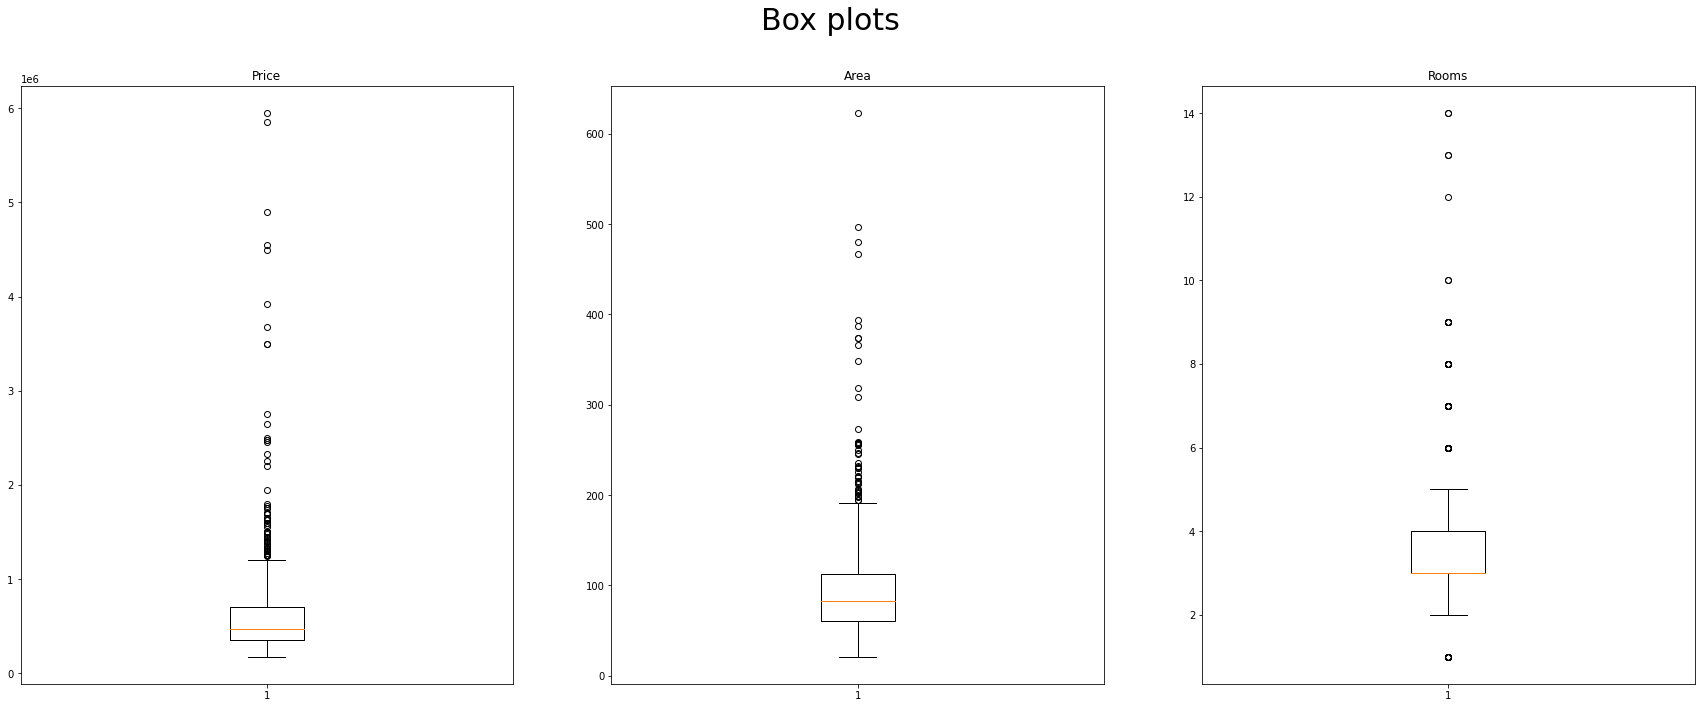

In [92]:
plt.figure(figsize=(30,11),)

plt.subplot(131,  title='Price')
plt.boxplot(df.Price,)


plt.subplot(132, title='Area',)
plt.boxplot(df.Area,)


plt.subplot(133, title='Rooms',)
plt.boxplot(df.Room,)

plt.suptitle('Box plots', fontsize='30')
plt.show()

В цене и жилой площади можно наблюдать выбросы, в комнатах их относительно немного 

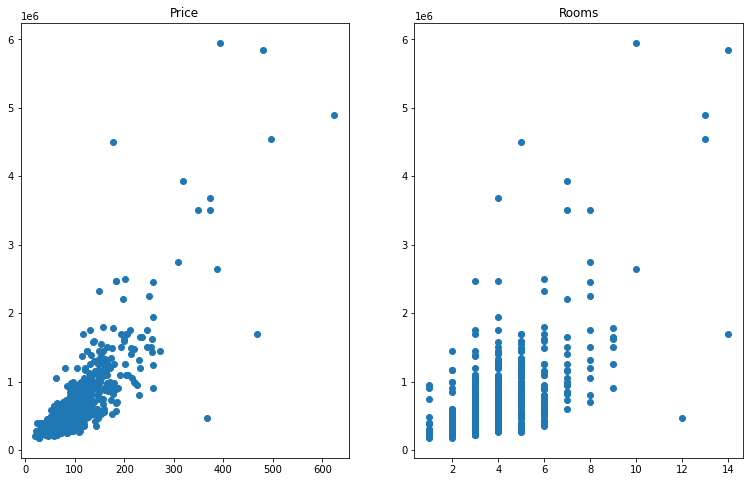

In [93]:
plt.figure(figsize=(20, 8),)


plt.subplot(131,  title='Price')
plt.scatter(df['Area'], df['Price'])


plt.subplot(132, title='Rooms',)
plt.scatter(df['Room'], df['Price'])

plt.show()


<Figure size 432x288 with 0 Axes>

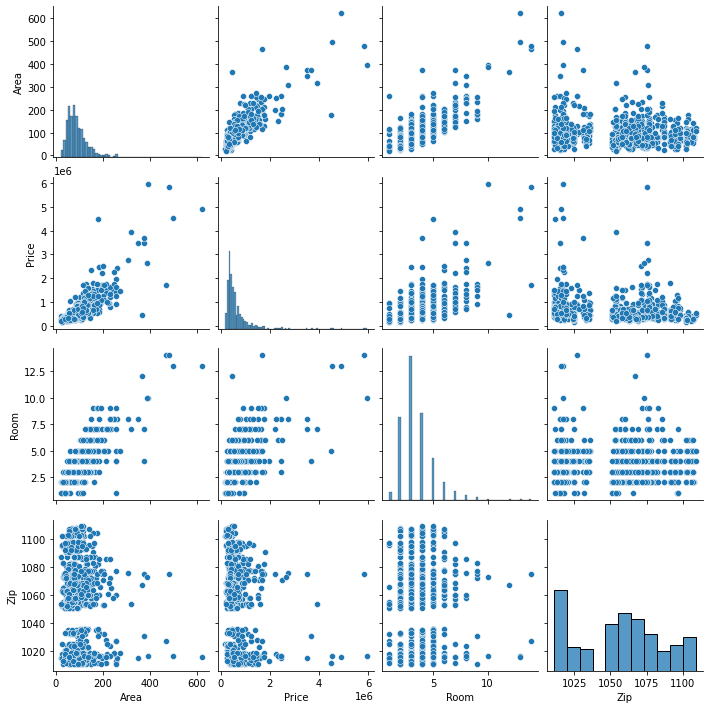

In [95]:
plt.figure()
sns.pairplot(df[['Area', 'Price', 'Room', 'Zip']],)
plt.show()

Построим матрицу корреляции

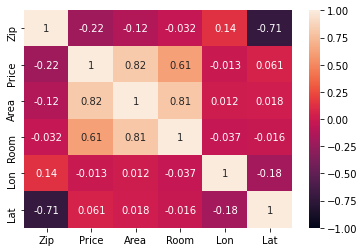

In [96]:
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)

Линейная зависимость цены лучше всего прослеживается с жилой площадью и количеством комнат

Датасет на карте

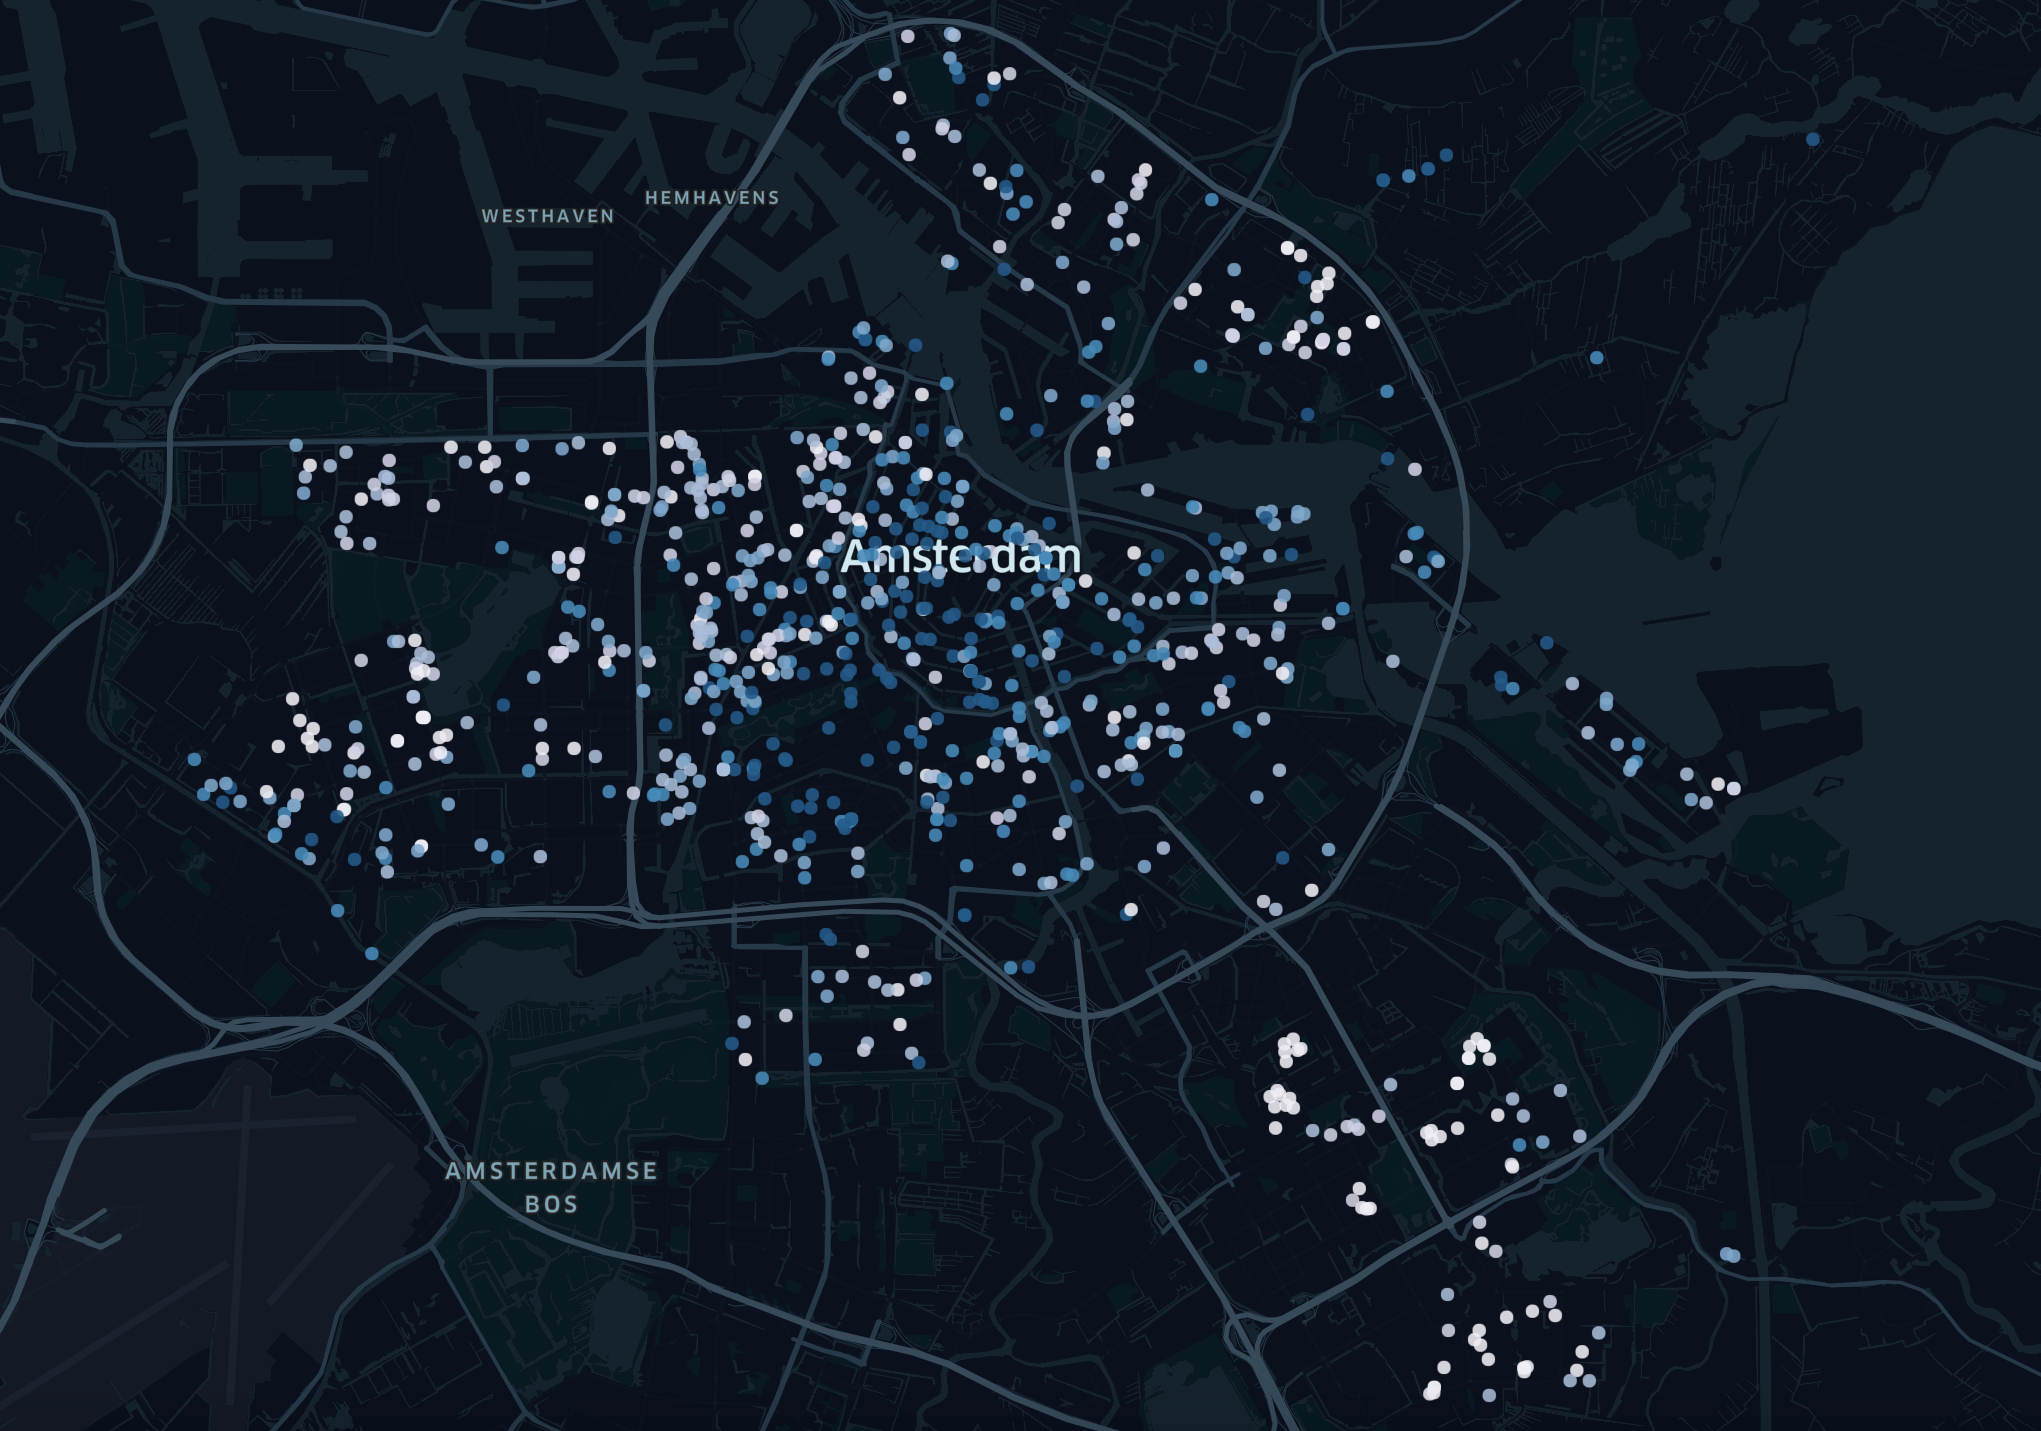

Видно, что цены уменьшаются по мере удаления от центра города.